In [1]:
from pysus.demography import geobase
from pysus.demography.geobase import GeoBase
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Generating Synthetic demographical data with PySUS
The package `pysus.demography` includes tools to synthetize population data with the same demographical characteristics as the brazilian population.

## Defining the geographical base
Building the geographical base can take a while, because we need to download the data from IBGE. The code below pulls the map boundaries.

In [2]:
GB = GeoBase(level='State')
gdf = GB.map('all')  # Fetch all states
gdf

Loading the Map...


/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ..."


You can define your geographical base on different levels

In [3]:
print(geobase.LEVELS.keys())

dict_keys(['Country', 'Region', 'State', 'Meso region', 'Micro region', 'Immediate region', 'Census weighting area', 'Census tract', 'Municipality', 'Municipality seats', 'Metropolitan areas', 'Urban footprints', "Brazil's Legal Amazon", 'Biomes', 'Environmental Conservation Units', 'Disaster risk areas', 'Indigenous lands', 'Semi Arid region', 'Health facilities', 'Health regions', 'Neighborhood limits'])


PySUS use the `geobr` library to download the maps, thus you can pass aditional parameters to the `map` function depending on the Level you are working at. You can use the `help_fetch_map` method of `GeoBase` to check what parameters are available at the level of you geobase. 

In [4]:
GB.help_fetch_map()

Help on function read_state in module geobr.read_state:

read_state(code_state='all', year=2010, simplified=True, verbose=False)
    Download shapefiles of Brazilian states as geopandas objects.
    
     Data at scale 1:250,000, using Geodetic reference system "SIRGAS2000" and CRS(4674)
    
    Parameters
    ----------
    code_state : str, optional
        The two-digit code of a state or a two-letter uppercase abbreviation 
        (e.g. 33 or "RJ"). If code_state="all", all states will be loaded (Default).
    year : int, optional
        Year of the data, by default 2010
    simplified: boolean, by default True
        Data 'type', indicating whether the function returns the 'original' dataset 
        with high resolution or a dataset with 'simplified' borders (Default)
    verbose : bool, optional
        by default False
    
    Returns
    -------
    gpd.GeoDataFrame
        Metadata and geopackage of selected states
    
    Raises
    ------
    Exception
        If para

## Geting the population data
Now we download the population data, and aggregate for each polygon in our geographical base

In [5]:
GB.demographics()

Fetching population data...


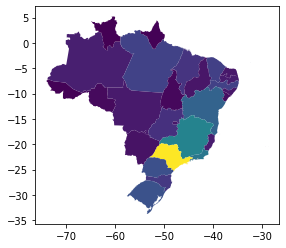

In [6]:
GB.plot_pop()

## Generating the synthetic individuals
First let's reduce our geographical base to a single state to simplify our task.

In [7]:
GB = GeoBase(level='State')
gdf = GB.map('MG')  # Fetch only MG
GB.demographics()
gdf

Loading the Map...
Fetching population data...


,code_state,abbrev_state,name_state,code_region,name_region,geometry,population
0,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-41.87545 -20.76487, -41.87338...",2.692211e+07


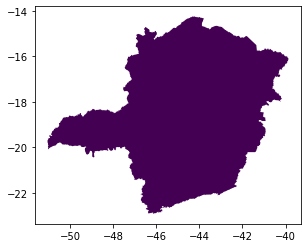

In [8]:
GB.plot_pop()

We will synthesize a population $0.05\%$ the size of the actual population of MG, because this step is very time consuming.

In [9]:
GB.generate_populations(scale=0.0005)

Synthetizing 13461 individuals
6901 POINT (-42.81723878069685 -17.68929438524477)


In [10]:
GB.pop

,sex,age,geometry,longitude,latitude
0,1,42,POINT (-42.81724 -17.68929),-42.817239,-17.689294
1,1,21,POINT (-42.75766 -17.06457),-42.757660,-17.064573
2,0,38,POINT (-45.02620 -20.30186),-45.026199,-20.301861
3,0,17,POINT (-44.77909 -19.19668),-44.779088,-19.196676
4,0,7,POINT (-42.23332 -17.08750),-42.233317,-17.087502
...,...,...,...,...,...
6896,1,24,POINT (-41.32128 -19.13660),-41.321285,-19.136600
6897,1,4,POINT (-43.18249 -20.73437),-43.182492,-20.734369
6898,0,74,POINT (-44.77175 -15.92383),-44.771748,-15.923834
6899,1,87,POINT (-43.46758 -21.64484),-43.467583,-21.644835


Finally, we can plot our population, and see how our synthetic is uniformly distributed over the state of MG.

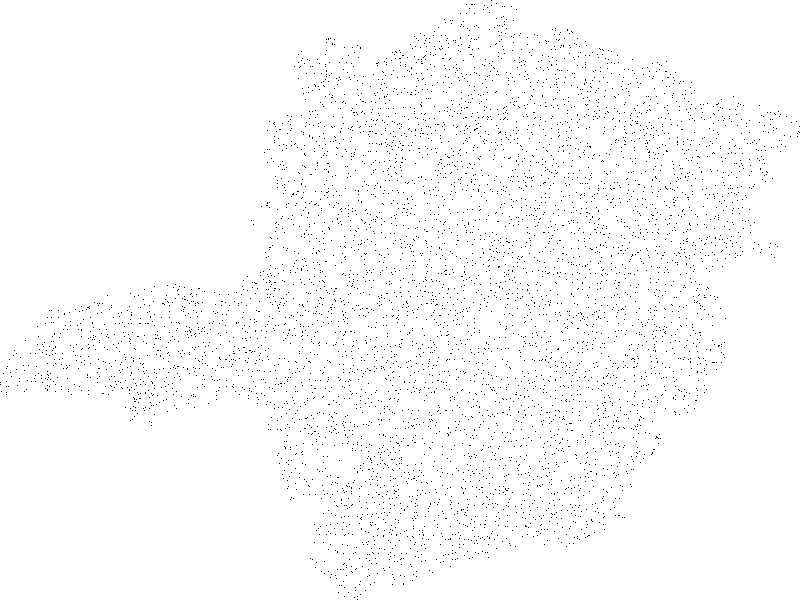

In [11]:
GB.plot_synthetic_pop()